In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, genpareto, t
import matplotlib.pyplot as plt
from scipy import stats

# Problem1

Use the data in problem1.csv. Fit a Normal Distribution and a Generalized T distribution to this data.
Calculate the VaR and ES for both fitted distributions.
Overlay the graphs the distribution PDFs, VaR, and ES values. What do you notice? Explain the
differences.

In [2]:
df=pd.read_csv('problem1.csv')
df

,x
0,-0.002665
1,-0.045128
2,0.053635
3,0.010450
4,-0.016284
...,...
495,0.009279
496,-0.001121
497,0.075188
498,0.038520


In [188]:
mean, std_dev = norm.fit(df.values)

In [189]:
df, loc, scale = t.fit(df.values)

In [190]:
alpha=0.05

VaR_norm = -norm.ppf(alpha, mean, std_dev)
ES_norm = (mean + std_dev * norm.pdf(norm.ppf(alpha)) / alpha)
print("Normal VaR: {:.4f}".format(VaR_norm))
print("Normal ES: {:.4f}".format(ES_norm))

VaR_gt = -t.ppf(alpha, df, loc, scale)
ES_gt = -(loc + scale * (df/(df-2)) * t.ppf(alpha, df) / np.sqrt(df-2))
print("Generalized T VaR: {:.4f}".format(VaR_gt))
print("Generalized T ES: {:.4f}".format(ES_gt))

Normal VaR: 0.0813
Normal ES: 0.0999
Generalized T VaR: 0.0765
Generalized T ES: 0.0962


In [191]:
df1=pd.read_csv('problem1.csv')

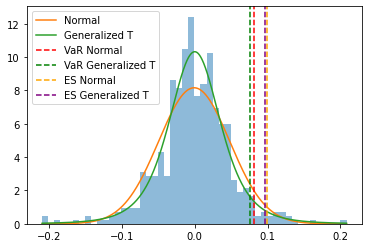

In [192]:
data=df1.values
x = np.linspace(data.min(), data.max(), 1000)
plt.hist(data, bins=50, density=True, alpha=0.5)
plt.plot(x, norm.pdf(x, mean, std_dev), label="Normal")
plt.plot(x, t.pdf(x, df, loc, scale), label="Generalized T")
plt.axvline(x=VaR_norm, color='red', linestyle='--', label="VaR Normal")
plt.axvline(x=VaR_gt, color='green', linestyle='--', label="VaR Generalized T")
plt.axvline(x=ES_norm, color='orange', linestyle='--', label="ES Normal")
plt.axvline(x=ES_gt, color='purple', linestyle='--', label="ES Generalized T")
plt.legend()
plt.show()

# Problem2

In your main repository, create a Library for risk management. Create modules, classes, packages, etc
as you see fit. Include all the functionality we have discussed so far in class. Make sure it includes
1. Covariance estimation techniques.
2. Non PSD fixes for correlation matrices
3. Simulation Methods
4. VaR calculation methods (all discussed)
5. ES calculation

Create a test suite and show that each function performs as expected.

In [3]:
import quantitative_risk_management as quant

In [4]:
df=pd.read_csv('DailyPrices.csv')
df.drop('Date', axis=1, inplace=True)
df

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,314.279999,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,316.200012,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,315.649994,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,313.549988,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,314.799988,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,412.350006,154.264465,258.350006,103.389999,189.979996,104.779999,105.220001,186.529999,211.000000,308.510010,...,165.389999,65.910004,46.910000,178.820007,84.500000,459.079987,283.140015,41.130001,49.561237,80.222557
245,409.829987,151.498688,256.769989,102.180000,194.759995,102.900002,103.470001,186.059998,210.889999,308.429993,...,163.000000,66.169998,46.959999,177.550003,86.360001,469.100006,271.480011,41.340000,49.076408,79.853935
246,415.190002,154.414230,267.559998,102.110001,196.809998,107.639999,108.040001,191.619995,221.729996,312.970001,...,162.940002,65.080002,46.560001,181.020004,86.050003,468.329987,272.450012,41.400002,49.501869,79.565002
247,410.649994,151.688400,266.730011,100.050003,201.289993,99.370003,100.000000,183.429993,222.050003,308.480011,...,161.559998,64.790001,46.500000,177.759995,85.669998,469.649994,268.220001,41.570000,48.739998,80.309998


In [5]:
returns=df.pct_change()
returns.dropna(inplace=True)
returns

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [6]:
ew_cov=quant.exp_weighted_cov(returns, lambda_=0.97)
pd.DataFrame(ew_cov)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000155,0.000210,0.000235,0.000285,0.000279,0.000279,0.000284,0.000331,0.000368,0.000125,...,0.000172,0.000082,0.000052,0.000197,0.000042,0.000034,0.000171,0.000209,0.000160,0.000063
1,0.000210,0.000421,0.000321,0.000329,0.000526,0.000417,0.000417,0.000563,0.000527,0.000152,...,0.000182,0.000084,0.000039,0.000286,0.000087,0.000035,0.000222,0.000286,0.000201,0.000064
2,0.000235,0.000321,0.000499,0.000505,0.000438,0.000521,0.000529,0.000664,0.000610,0.000166,...,0.000220,0.000084,0.000042,0.000291,-0.000003,0.000032,0.000224,0.000297,0.000192,0.000038
3,0.000285,0.000329,0.000505,0.000939,0.000542,0.000657,0.000671,0.000923,0.000696,0.000200,...,0.000277,0.000128,0.000050,0.000336,-0.000115,-0.000016,0.000296,0.000436,0.000266,0.000039
4,0.000279,0.000526,0.000438,0.000542,0.002369,0.000434,0.000444,0.000636,0.001212,0.000119,...,0.000292,0.000079,0.000004,0.000381,0.000004,0.000066,0.000252,0.000666,0.000179,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000034,0.000035,0.000032,-0.000016,0.000066,-0.000019,-0.000017,-0.000049,0.000013,0.000046,...,0.000048,0.000044,0.000033,0.000022,0.000087,0.000163,-0.000025,0.000052,-0.000003,0.000064
96,0.000171,0.000222,0.000224,0.000296,0.000252,0.000307,0.000307,0.000380,0.000468,0.000106,...,0.000168,0.000131,0.000194,0.000257,0.000034,-0.000025,0.000531,0.000186,0.000205,0.000082
97,0.000209,0.000286,0.000297,0.000436,0.000666,0.000325,0.000330,0.000615,0.000536,0.000165,...,0.000230,0.000097,0.000028,0.000250,0.000041,0.000052,0.000186,0.000716,0.000213,0.000064
98,0.000160,0.000201,0.000192,0.000266,0.000179,0.000279,0.000284,0.000361,0.000300,0.000142,...,0.000245,0.000092,0.000073,0.000186,0.000048,-0.000003,0.000205,0.000213,0.000325,0.000072


In [7]:
def is_pos_def(x):
    return np.all(np.linalg.eigvals(x) > -1e-8)
print('ew_cov is psd:{}'.format(is_pos_def(ew_cov)))

ew_cov is psd:True


In [8]:
#homework example
n=500
sigma=np.full((n,n), 0.9)
np.fill_diagonal(sigma, 1.0)

sigma[1,2]=0.7357
sigma[2,1]=0.7357


chol=quant.chol_psd(sigma)
higham=quant.Higham_psd(sigma)
near=quant.near_psd(sigma)
print('chol_psd output is psd: {}'.format(is_pos_def(sigma)))
print('higham_psd output is psd: {}'.format(is_pos_def(higham)))
print('near_psd output is psd: {}'.format(is_pos_def(near)))

chol_psd output is psd: False
higham_psd output is psd: True
near_psd output is psd: True


In [9]:
frobenius_higham = np.linalg.norm(sigma - higham, 'fro')
frobenius_near=np.linalg.norm(sigma - near, 'fro')
print(frobenius_higham)
print(frobenius_near)

0.08964799527303303
0.6275226557619878


In [10]:
pd.DataFrame(quant.multivar_norm_simu(ew_cov, method='pca'))

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.000681,-0.003501,0.001454,0.001067,0.005096,-0.010931,-0.010323,-0.018953,0.008357,0.004829,...,0.029399,-0.005707,-0.020377,0.011154,-0.012993,0.012359,-0.004560,0.024195,-0.009903,0.005581
1,0.014987,0.035470,0.022816,0.028110,0.053338,0.020209,0.022016,0.009943,0.059197,-0.000787,...,-0.004392,0.004272,-0.000900,0.016560,0.001842,-0.002351,-0.002278,0.043969,0.003006,0.011760
2,-0.001483,0.000361,0.006905,-0.015432,0.029876,-0.003245,-0.003077,-0.005298,0.002183,0.007743,...,-0.001814,-0.009376,-0.014982,0.007871,-0.010409,-0.022294,-0.025842,-0.001948,0.010739,0.027411
3,0.001372,-0.000180,-0.002423,-0.017712,-0.025210,-0.010297,-0.011144,0.007512,0.011095,-0.000025,...,-0.016339,0.002142,0.007572,-0.004737,0.016656,0.001098,0.012618,0.010216,0.008305,-0.003246
4,-0.000588,0.022537,0.017202,-0.007739,0.062273,0.005304,0.004139,0.009337,0.026693,-0.011828,...,-0.016107,-0.013627,-0.007391,0.018701,-0.010218,-0.003901,-0.031811,0.018564,-0.020131,-0.009046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.017285,0.027673,0.036068,0.038896,0.016110,0.024637,0.025329,0.073655,0.022738,0.015084,...,0.024286,0.012009,-0.004109,0.020185,-0.003744,0.005786,-0.010511,0.031667,0.029622,0.003365
24996,-0.025930,-0.038067,-0.026632,-0.027743,0.003117,-0.018066,-0.017888,-0.007501,-0.047362,-0.029957,...,-0.028920,-0.029817,-0.019982,-0.038581,-0.019331,-0.001471,-0.032174,-0.023476,-0.030525,-0.027577
24997,0.003789,0.005038,0.004345,0.004365,0.001897,0.024380,0.023993,-0.044102,-0.008781,0.005451,...,0.000176,-0.004658,0.000754,0.011322,0.004179,0.017486,0.018102,-0.011315,-0.018095,-0.007377
24998,-0.007944,-0.005024,0.017991,0.035952,-0.049214,0.041106,0.037988,0.110634,-0.032396,-0.015286,...,-0.019902,-0.018668,-0.017591,-0.004456,-0.032450,-0.022761,0.006883,-0.027548,-0.018778,-0.046818


In [11]:
por = pd.read_csv("Portfolio.csv", index_col=0)
prices = pd.read_csv("DailyPrices.csv")

In [12]:
por1=por.loc['A']
stock1=por1.iloc[:, 0]
holding1=por1.iloc[:, 1]
weight1=holding1.div(holding1.sum())
return1=[]
for m in stock1.tolist():
    return1.append(returns.loc[:,m].tolist())
    
return1=pd.DataFrame(return1).transpose()
port_return1=return1.dot(np.array(weight1).transpose())

current_value=[]
for m in stock1.tolist():
    col=(prices.loc[:, m]).tolist()
    current_value.append(col[-1])

pv=pd.DataFrame(current_value).values.T@pd.DataFrame(holding1).values
pv=float(pv)

grad_R=[]
for m in range(len(current_value)):
    grad_R.append((current_value[m]/pv)*(holding1.tolist()[m]))

asset_prices=[]
for m in stock1.tolist():
    asset_prices.append(prices[m].tolist())

cov_ewm = quant.exp_weighted_cov(return1, lambda_=0.94)

var=pv*1.645*np.sqrt(pd.DataFrame(grad_R).T.values@cov_ewm@pd.DataFrame(grad_R).values)
print("Portfolio A VaR: ${:.4f}".format(float(var)))


Portfolio A VaR: $5670.7075


# Problem3

Use your repository from #2.

Using Portfolio.csv and DailyPrices.csv. Assume the expected return on all stocks is 0.

This file contains the stock holdings of 3 portfolios. You own each of these portfolios.

Fit a Generalized T model to each stock and calculate the VaR and ES of each portfolio as well as your
total VaR and ES. Compare the results from this to your VaR form Problem 3 from Week 4.

In [203]:
df1=pd.read_csv('Portfolio.csv', index_col=0)
df1

,Stock,Holding
Portfolio,,
A,AAPL,58
A,TSLA,10
A,JPM,64
A,HD,27
A,BAC,209
...,...,...
C,F,397
C,LRCX,14
C,MO,197


In [204]:
df2=pd.read_csv('DailyPrices.csv')
df2.drop(['Date'], axis=1, inplace=True)
df2

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
0,432.011322,167.863144,292.261475,155.167007,291.920013,135.526001,135.300003,217.699997,242.443298,314.279999,...,197.263107,64.592575,46.290192,151.118790,58.443172,377.068665,247.324020,48.182598,60.352272,66.789505
1,438.978333,171.749573,297.680664,156.510498,307.476654,136.608505,136.425507,221.000000,264.702484,316.200012,...,199.789520,64.328896,46.502743,159.029022,58.653572,372.440185,255.490829,49.446892,62.076630,67.673614
2,439.470337,171.511032,297.333191,158.100494,307.796661,137.738007,137.487503,216.539993,264.862305,315.649994,...,201.139511,64.172638,46.770744,165.211960,59.198696,377.000458,256.349976,50.203476,61.990410,65.915215
3,430.082642,167.863144,288.626679,154.652496,292.116669,132.539002,132.308502,207.710007,244.841064,313.549988,...,194.109894,64.514450,47.473091,157.448944,58.615318,378.822571,248.439911,48.600708,59.921181,64.019295
4,427.297852,166.292648,285.846893,152.601502,285.660004,130.403000,130.467499,206.160004,236.199127,314.799988,...,193.984528,64.455841,47.815025,157.380234,58.385788,376.571686,245.042847,48.381695,59.700851,64.981995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,412.350006,154.264465,258.350006,103.389999,189.979996,104.779999,105.220001,186.529999,211.000000,308.510010,...,165.389999,65.910004,46.910000,178.820007,84.500000,459.079987,283.140015,41.130001,49.561237,80.222557
245,409.829987,151.498688,256.769989,102.180000,194.759995,102.900002,103.470001,186.059998,210.889999,308.429993,...,163.000000,66.169998,46.959999,177.550003,86.360001,469.100006,271.480011,41.340000,49.076408,79.853935
246,415.190002,154.414230,267.559998,102.110001,196.809998,107.639999,108.040001,191.619995,221.729996,312.970001,...,162.940002,65.080002,46.560001,181.020004,86.050003,468.329987,272.450012,41.400002,49.501869,79.565002
247,410.649994,151.688400,266.730011,100.050003,201.289993,99.370003,100.000000,183.429993,222.050003,308.480011,...,161.559998,64.790001,46.500000,177.759995,85.669998,469.649994,268.220001,41.570000,48.739998,80.309998


In [205]:
rt=df2.pct_change()
rt.dropna(inplace=True)
rt

,SPY,AAPL,MSFT,AMZN,TSLA,GOOGL,GOOG,META,NVDA,BRK-B,...,PNC,MDLZ,MO,ADI,GILD,LMT,SYK,GM,TFC,TJX
1,0.016127,0.023152,0.018542,0.008658,0.053291,0.007987,0.008319,0.015158,0.091812,0.006109,...,0.012807,-0.004082,0.004592,0.052344,0.003600,-0.012275,0.033021,0.026240,0.028572,0.013237
2,0.001121,-0.001389,-0.001167,0.010159,0.001041,0.008268,0.007784,-0.020181,0.000604,-0.001739,...,0.006757,-0.002429,0.005763,0.038879,0.009294,0.012244,0.003363,0.015301,-0.001389,-0.025984
3,-0.021361,-0.021269,-0.029282,-0.021809,-0.050943,-0.037746,-0.037669,-0.040778,-0.075591,-0.006653,...,-0.034949,0.005326,0.015017,-0.046988,-0.009855,0.004833,-0.030857,-0.031925,-0.033380,-0.028763
4,-0.006475,-0.009356,-0.009631,-0.013262,-0.022103,-0.016116,-0.013914,-0.007462,-0.035296,0.003987,...,-0.000646,-0.000908,0.007203,-0.000436,-0.003916,-0.005942,-0.013674,-0.004506,-0.003677,0.015038
5,-0.010732,-0.017812,-0.000729,-0.015753,-0.041366,-0.004521,-0.008163,-0.019790,-0.010659,-0.002033,...,0.009494,0.007121,-0.008891,0.003243,-0.001147,-0.000673,0.008342,-0.037654,-0.002246,-0.013605
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,-0.010629,0.024400,-0.023621,-0.084315,0.009083,-0.027474,-0.032904,-0.011866,-0.028053,-0.010742,...,-0.004694,-0.011251,-0.001277,-0.002677,0.038211,0.004134,0.002336,-0.008916,-0.005954,0.001617
245,-0.006111,-0.017929,-0.006116,-0.011703,0.025161,-0.017942,-0.016632,-0.002520,-0.000521,-0.000259,...,-0.014451,0.003945,0.001066,-0.007102,0.022012,0.021826,-0.041181,0.005106,-0.009782,-0.004595
246,0.013079,0.019245,0.042022,-0.000685,0.010526,0.046064,0.044167,0.029883,0.051401,0.014720,...,-0.000368,-0.016473,-0.008518,0.019544,-0.003590,-0.001641,0.003573,0.001451,0.008669,-0.003618
247,-0.010935,-0.017653,-0.003102,-0.020174,0.022763,-0.076830,-0.074417,-0.042741,0.001443,-0.014346,...,-0.008469,-0.004456,-0.001289,-0.018009,-0.004416,0.002819,-0.015526,0.004106,-0.015391,0.009363


In [206]:
por_A=df1.loc['A']
por_A

,Stock,Holding
Portfolio,,
A,AAPL,58
A,TSLA,10
A,JPM,64
A,HD,27
A,BAC,209
A,XOM,140
A,AVGO,17
A,PEP,57
A,TMO,17


In [207]:
def multivar_norm_simu(cov, method='direct', mean = 0, explained_variance=1.0, samples_num=25000):
    if method == 'direct':
        L = chol_psd(cov)
        normal_samples = np.random.normal(size=(cov.shape[0], samples_num))
        samples = np.transpose(L @ normal_samples + mean)
        return samples
    
    elif method == 'pca':
        vals, vecs = np.linalg.eigh(cov)
        idx = vals > 1e-8
        vals = vals[idx]
        vecs = vecs[:, idx]
        
        idx = np.argsort(vals)[::-1]
        vals = vals[idx]
        vecs = vecs[:, idx]
        
        if explained_variance == 1.0:
            explained_variance = (np.cumsum(vals)/np.sum(vals))[-1]
        
        n_components = np.where((np.cumsum(vals)/np.sum(vals))>= explained_variance)[0][0] + 1
        vecs = vecs[:,:n_components]
        vals = vals[:n_components]

        normal_samples = np.random.normal(size=(n_components, samples_num))
        
        B = vecs @ np.diag(np.sqrt(vals))
        samples = np.transpose(B @ normal_samples)
        
        return samples

In [208]:
stock=por_A.loc[:,'Stock'].tolist()
holding=por_A.loc[:,'Holding'].tolist()
weight=np.array(holding)/np.array(holding).sum()

rt_A=[]
for m in stock:
    rt_A.append((rt.loc[:, m]).tolist())
rt_A=pd.DataFrame(rt_A).T

current_value=[]
for m in stock:
    col=(df2.loc[:, m]).tolist()
    current_value.append(col[-1])
    
pv=pd.DataFrame(current_value).values.T@pd.DataFrame(holding).values
pv=float(pv)

In [209]:
np.random.seed(42)
return_cdf=[]
par=[]
alpha=0.05
for col in rt_A.columns:
    df, loc, scale = stats.t.fit(rt_A[col].values)
    par.append([df,loc,scale])
    return_cdf.append(stats.t.cdf(rt_A[col].values, df=df, loc=loc, scale=scale).tolist())

return_cdf=pd.DataFrame(return_cdf).T
spearman_cor=return_cdf.corr(method='spearman')

sample=pd.DataFrame(multivar_norm_simu(spearman_cor, method='pca'))


sample_cdf=[]
for col in sample.columns:
    sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())

simu_return=[]
for i in range(len(sample_cdf)):
    simu_return.append(stats.t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    
simu_return=np.array(simu_return)
sim_price=(1 + simu_return.T)*np.array(current_value)
pVals = sim_price.dot(np.array(holding))
pVals.sort()

a = int(0.05 * 25000)
VaR = pv - pVals[a]

v=[]
for m in pVals.tolist():
    v.append(pv-m)
v=np.array(v)
ES=v[v>=VaR].mean()
print('Portfolio A')
print('VaR: {:.4f}'.format(VaR))
print('ES: {:.4f}'.format(ES))

Portfolio A
VaR: 7919.4808
ES: 10555.3866


In [210]:
por_B=df1.loc['B']
stock=por_B.loc[:,'Stock'].tolist()
holding=por_B.loc[:,'Holding'].tolist()
weight=np.array(holding)/np.array(holding).sum()

rt_B=[]
for m in stock:
    rt_B.append((rt.loc[:, m]).tolist())
rt_B=pd.DataFrame(rt_B).T

current_value=[]
for m in stock:
    col=(df2.loc[:, m]).tolist()
    current_value.append(col[-1])
    
pv=pd.DataFrame(current_value).values.T@pd.DataFrame(holding).values
pv=float(pv)

In [111]:
np.random.seed(42)
return_cdf=[]
par=[]
alpha=0.05
for col in rt_B.columns:
    df, loc, scale = stats.t.fit(rt_B[col].values)
    par.append([df,loc,scale])
    return_cdf.append(stats.t.cdf(rt_B[col].values, df=df, loc=loc, scale=scale).tolist())

return_cdf=pd.DataFrame(return_cdf).T
spearman_cor=return_cdf.corr(method='spearman')

sample=pd.DataFrame(multivar_norm_simu(spearman_cor, method='pca'))


sample_cdf=[]
for col in sample.columns:
    sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())

simu_return=[]
for i in range(len(sample_cdf)):
    simu_return.append(stats.t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    
simu_return=np.array(simu_return)
sim_price=(1 + simu_return.T)*np.array(current_value)
pVals = sim_price.dot(np.array(holding))
pVals.sort()

a = int(0.05 * 25000)
VaR = pv - pVals[a]

v=[]
for m in pVals.tolist():
    v.append(pv-m)
v=np.array(v)
ES=v[v>=VaR].mean()
print('Portfolio B')
print('VaR: {:.4f}'.format(VaR))
print('ES: {:.4f}'.format(ES))

Portfolio B
VaR: 6616.3888
ES: 8851.9904


In [112]:
por_C=df1.loc['C']
stock=por_C.loc[:,'Stock'].tolist()
holding=por_C.loc[:,'Holding'].tolist()
weight=np.array(holding)/np.array(holding).sum()

rt_C=[]
for m in stock:
    rt_C.append((rt.loc[:, m]).tolist())
rt_C=pd.DataFrame(rt_C).T

current_value=[]
for m in stock:
    col=(df2.loc[:, m]).tolist()
    current_value.append(col[-1])
    
pv=pd.DataFrame(current_value).values.T@pd.DataFrame(holding).values
pv=float(pv)

In [113]:
np.random.seed(42)
return_cdf=[]
par=[]
alpha=0.05
for col in rt_C.columns:
    df, loc, scale = stats.t.fit(rt_C[col].values)
    par.append([df,loc,scale])
    return_cdf.append(stats.t.cdf(rt_C[col].values, df=df, loc=loc, scale=scale).tolist())

return_cdf=pd.DataFrame(return_cdf).T
spearman_cor=return_cdf.corr(method='spearman')

sample=pd.DataFrame(multivar_norm_simu(spearman_cor, method='pca'))


sample_cdf=[]
for col in sample.columns:
    sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())

simu_return=[]
for i in range(len(sample_cdf)):
    simu_return.append(stats.t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    
simu_return=np.array(simu_return)
sim_price=(1 + simu_return.T)*np.array(current_value)
pVals = sim_price.dot(np.array(holding))
pVals.sort()

a = int(0.05 * 25000)
VaR = pv - pVals[a]

v=[]
for m in pVals.tolist():
    v.append(pv-m)
v=np.array(v)
ES=v[v>=VaR].mean()
print('Portfolio C')
print('VaR: {:.4f}'.format(VaR))
print('ES: {:.4f}'.format(ES))

Portfolio C
VaR: 5570.5298
ES: 7492.2675


In [114]:
por_t=df1
stock=por_t.loc[:,'Stock'].tolist()
holding=por_t.loc[:,'Holding'].tolist()
weight=np.array(holding)/np.array(holding).sum()

rt_t=[]
for m in stock:
    rt_t.append((rt.loc[:, m]).tolist())
rt_t=pd.DataFrame(rt_t).T

current_value=[]
for m in stock:
    col=(df2.loc[:, m]).tolist()
    current_value.append(col[-1])
    
pv=pd.DataFrame(current_value).values.T@pd.DataFrame(holding).values
pv=float(pv)

In [115]:
np.random.seed(42)
return_cdf=[]
par=[]
alpha=0.05
for col in rt_t.columns:
    df, loc, scale = stats.t.fit(rt_t[col].values)
    par.append([df,loc,scale])
    return_cdf.append(stats.t.cdf(rt_t[col].values, df=df, loc=loc, scale=scale).tolist())

return_cdf=pd.DataFrame(return_cdf).T
spearman_cor=return_cdf.corr(method='spearman')

sample=pd.DataFrame(multivar_norm_simu(spearman_cor, method='pca'))


sample_cdf=[]
for col in sample.columns:
    sample_cdf.append(norm.cdf(sample[col].values, loc=0, scale=1).tolist())

simu_return=[]
for i in range(len(sample_cdf)):
    simu_return.append(stats.t.ppf(sample_cdf[i], df=par[i][0], loc=par[i][1], scale=par[i][2]))
    
simu_return=np.array(simu_return)
sim_price=(1 + simu_return.T)*np.array(current_value)
pVals = sim_price.dot(np.array(holding))
pVals.sort()

a = int(0.05 * 25000)
VaR = pv - pVals[a]

v=[]
for m in pVals.tolist():
    v.append(pv-m)
v=np.array(v)
ES=v[v>=VaR].mean()
print('Portfolio total')
print('VaR: {:.4f}'.format(VaR))
print('ES: {:.4f}'.format(ES))

Portfolio total
VaR: 19750.8042
ES: 26475.2316
